# ASSIGNMENT 2

## Submitted by - 
    Raghav Aggarwal 20EC10064 (Team Leader)
    Darpan Aswal 20EC10026
    Rudransh Gupta 20EE30036
    Parv Jain 20IE10048
    Adarsh Jha 20CH30003
    Harsh Gupta 20CH10021
## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

with open('Results.txt', 'w') as f:
        f.writelines("ASSIGNMENT 2 \n\nSubmitted by :- \n Raghav Aggarwal 20EC10064 (Team Leader)\n Rudransh Gupta 20EE30036\n Parv Jain 20IE10048\n Adarsh Jha 20CH30003\n Darpan Aswal 20EC10026\n Harsh Gupta 20CH10021")
        f.writelines("\n\nNote : The dataset gets shuffled on each run, hence the accuracy might change with each run.\n\n")
        f.writelines("Results : \n\n")

## Reading Data and shuffling it 

In [2]:
data = pd.read_csv("sobar-72.csv")

In [3]:
data = data.sample(frac=1).reset_index(drop=True)

## Normalising Dataset

In [4]:
for column in data.columns:
    if(column!="ca_cervix"):
        data[column] = (data[column]-data[column].mean()) / data[column].std()    

## Splitting the Data into training and testing datasets

In [5]:
train = data[:-8]
test = data[-8:]

In [6]:
train_y = np.array(train["ca_cervix"])
train_y = train_y.reshape(train_y.shape[0],1)
train_x = np.array(train.loc[:, train.columns != "ca_cervix"])

In [7]:
test_y = np.array(test["ca_cervix"])
test_y = test_y.reshape(test_y.shape[0],1)
test_x = np.array(test.loc[:, test.columns != "ca_cervix"])

In [8]:
pred_y = np.arange(len(test_y))

## Defining the necessary functions

In [9]:
def accuracy(X,Y):
    return (np.sum((X-Y)==0)/len(X))*100

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## Training and predicting using model1 (Designed from scratch)

In [11]:
learning_rate = 0.001
iterations = 1000

n = train_x.shape[0]
m = train_x.shape[1]
weights = (np.random.rand(m,1)-0.5)*0.2

In [12]:
costlist = []
for i in range(iterations):
    z = sigmoid(np.dot(train_x,weights))
    cost = (-(train_y*np.log(z)) - (1-train_y)*np.log(1-z)).sum()/n
    dw = (np.dot(train_x.T,z - train_y)/n)*learning_rate
    weights -= dw
    costlist.append(cost)

train_pred = np.round(sigmoid(np.dot(train_x,weights)))

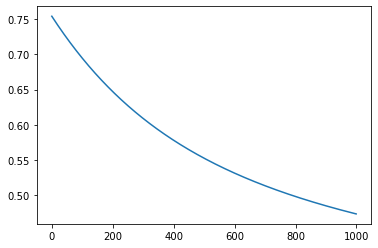

In [13]:
plt.plot(costlist)
plt.show()

In [14]:
print("Accuracy in training data using self made model - ",accuracy(train_y,train_pred),"%\n")
print("Accuracy in test data using self made model - ",accuracy(test_y,np.round(sigmoid(np.dot(test_x,weights)))),"%\n")

Accuracy in training data using self made model -  82.8125 %

Accuracy in test data using self made model -  75.0 %



## Training and predicting using model2 (Scikit logistic regression model)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != "ca_cervix"], data["ca_cervix"], test_size=0.1, random_state=0)
model2 = LogisticRegression(max_iter=iterations).fit(X_train,y_train)


In [16]:
print("Accuracy in training data using scikit logistic regression made model - ",accuracy(model2.predict(X_train),y_train),"%\n")
print("Accuracy in test data using scikit logistic regression model - ",accuracy(model2.predict(X_test),y_test),"%\n")

Accuracy in training data using scikit logistic regression made model -  100.0 %

Accuracy in test data using scikit logistic regression model -  87.5 %



In [17]:

with open('Results.txt', 'a') as f:
        f.writelines("Accuracy in training data using self made model - "+str(accuracy(train_y,train_pred))+"%\n")
        f.writelines("Accuracy in test data using self made model - "+str(accuracy(test_y,np.round(sigmoid(np.dot(test_x,weights)))))+"%\n")
        f.writelines("Accuracy in training data using scikit logistic regression made model - "+str(accuracy(model2.predict(X_train),y_train))+"%\n")
        f.writelines("Accuracy in test data using scikit logistic regression model - "+str(accuracy(model2.predict(X_test),y_test))+"%\n")